# IMPORT LIBRARIES

In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

### TASK 01 You have a dataset containing images of pets categorized into four classes: Angry, Sad, Happy, and Others. Explore the dataset to understand its attributes. Display the number of samples in each class.

In [6]:
main_dir = 'C://Users//Dummy//Desktop//Pets_Emotions'

image_paths = []
labels = []

subfolder_info = {}

for label, emotion in enumerate(os.listdir(main_dir)):
    subfolder_path = os.path.join(main_dir, emotion)
    
    num_images_in_subfolder = len(os.listdir(subfolder_path))
    subfolder_info[emotion] = num_images_in_subfolder

    for img_filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, img_filename)
        image_paths.append(img_path)
        labels.append(label)

print(f"Number of subfolders: {len(subfolder_info)}")
for emotion, num_images in subfolder_info.items():
    print(f"Subfolder '{emotion}' has {num_images} images")



Number of subfolders: 4
Subfolder 'Angry' has 75 images
Subfolder 'happy' has 90 images
Subfolder 'Other' has 47 images
Subfolder 'Sad' has 84 images


### TASK 02 Load the pet emotions dataset, resize the images to a common size (e.g., 224x224), normalize the pixel values, and split the dataset into training and testing sets.

In [7]:
image_size = (224, 224)
batch_size = 32
test_split = 0.2 

X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=test_split, random_state=42)

def preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)  
    img = tf.image.resize(img, image_size)  
    img = tf.cast(img, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return img, label

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(preprocess_image)
train_dataset = train_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(preprocess_image)
test_dataset = test_dataset.batch(batch_size)


num_train_samples = sum(batch[0].shape[0] for batch in train_dataset)

num_test_samples = sum(batch[0].shape[0] for batch in test_dataset)

print(f"Number of samples in the training dataset: {num_train_samples}")
print(f"Number of samples in the test dataset: {num_test_samples}")


Number of samples in the training dataset: 236
Number of samples in the test dataset: 60


### TASK 03 Perform EDA on the pet emotions dataset. Display the distribution of class labels using a bar plot.

Mean pixel values: 0.46211156249046326
Standard deviation of pixel values: 0.2593512535095215


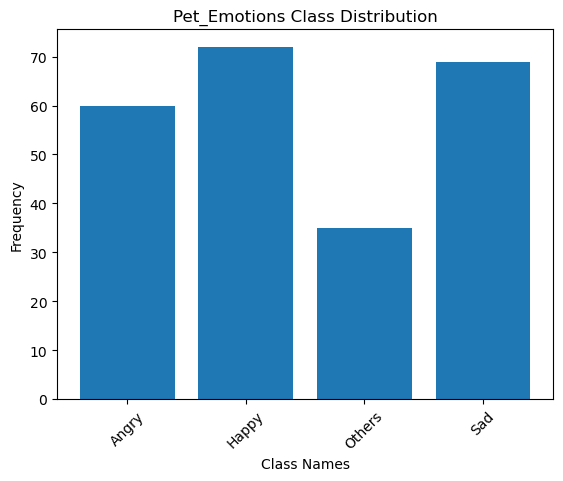

In [17]:
pixel_values = []

for batch in train_dataset:
    images, _ = batch  
    pixel_values.append(images.numpy())  

pixel_values = np.concatenate(pixel_values, axis=0)

mean = np.mean(pixel_values)
std = np.std(pixel_values)

# Print the results
print(f"Mean pixel values: {mean}")
print(f"Standard deviation of pixel values: {std}")

label_mapping = {
    0: 'Angry',
    1: 'Happy',
    2: 'Others',
    3: 'Sad'
}

y_train_strings = [label_mapping[label] for label in y_train]

class_counts = np.bincount(y_train)  

class_names = ['Angry', 'Happy', 'Others', 'Sad']

plt.bar(class_names, class_counts)
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Pet_Emotions Class Distribution')
plt.xticks(rotation=45)
plt.show()



### TASK 04 Display a few sample images from each class of the pet emotions dataset along with their labels.

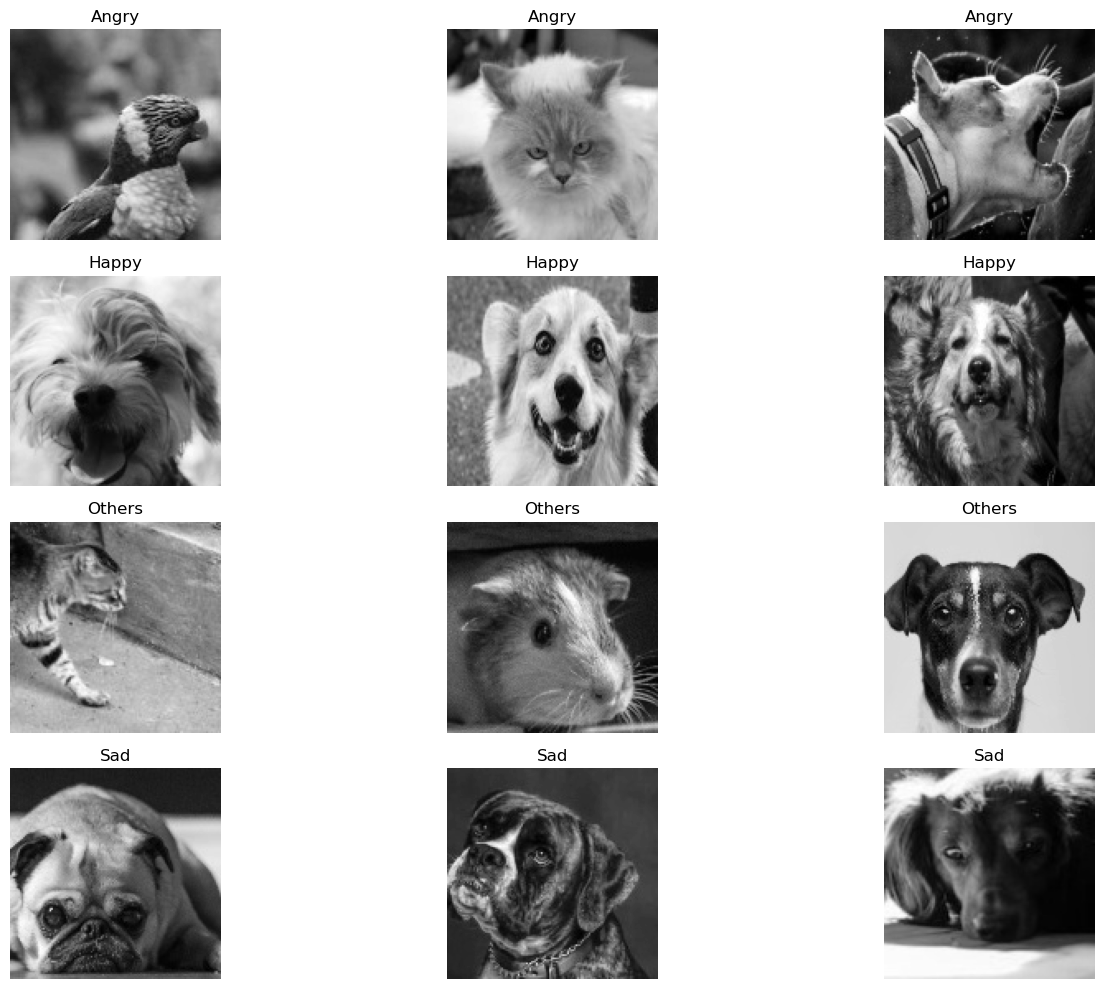

In [13]:

def display_sample_images(image_paths, labels, class_names, num_samples_per_class=3):
    plt.figure(figsize=(15, 10))
    
    for i, class_name in enumerate(class_names):
        class_images = [image_paths[j] for j in range(len(image_paths)) if labels[j] == i]
        random_samples = np.random.choice(class_images, num_samples_per_class, replace=False)
        
        for j, img_path in enumerate(random_samples):
            plt.subplot(len(class_names), num_samples_per_class, i * num_samples_per_class + j + 1)
            img = plt.imread(img_path)
            plt.imshow(img,cmap="gray")
            plt.title(class_names[i])
            plt.axis('off')    
            
    plt.tight_layout()
    plt.show()
    
class_names = ['Angry', 'Happy', 'Others', 'Sad']
display_sample_images(X_train, y_train, class_names)


### TASK 05 : You want to understand the distribution of emotions in the dataset. Calculate summary statistics for each class (Angry, Sad, Happy, Others).

In [16]:

for i, class_name in enumerate(class_names):
    num_images = class_counts[i]  
    mean_num_images = np.mean(class_counts)  
    std_num_images = np.std(class_counts)  
    
    print(f"Class: {class_name}")
    print(f"Number of Images: {num_images}")
    print(f"Mean Number of Images: {mean_num_images}")
    print(f"Standard Deviation of Images: {std_num_images}")
    print("\n")


Class: Angry
Number of Images: 60
Mean Number of Images: 59.0
Standard Deviation of Images: 14.543039572248986


Class: Happy
Number of Images: 72
Mean Number of Images: 59.0
Standard Deviation of Images: 14.543039572248986


Class: Others
Number of Images: 35
Mean Number of Images: 59.0
Standard Deviation of Images: 14.543039572248986


Class: Sad
Number of Images: 69
Mean Number of Images: 59.0
Standard Deviation of Images: 14.543039572248986


